In [ ]:
# Imports
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt

tfd = tfp.distributions
tfm = tf.math
tf.config.list_physical_devices(device_type=None)

In [5]:
# Constants  
m = 0.938 # GeV/c^2
gamma = -3 # Between -2 and -3
size = 512 # size of r, T, p, and f_boundary
au = 150e6 # 150e6 m/AU
r_limits = [119, 120]
T_limits = [0.001, 1000]

# Create boundary data
T = np.logspace(np.log10(T_limits[0]), np.log10(T_limits[1]), size).flatten()[:, None]
p = (np.sqrt((T+m)**2-m**2)).flatten()[:,None] # GeV/c
r = np.logspace(np.log10(r_limits[0]*au), np.log10(r_limits[1]*au), size).flatten()[:, None] # km
f_boundary = ((T + m)**gamma)/(p**2) # particles/(m^3 (GeV/c)^3)

# Get upper and lower bounds
lb = np.array([p[0], r[0]], dtype='float32') # TO-DO: Should this be p[0], r[0] or p_limits[0], r_limits[0]???
ub = np.array([p[-1], r[-1]], dtype='float32')

In [6]:
batchsize = 1032
boundary_batchsize = 512
n_samples = 20000

In [7]:
# Sample p and r according to a beta distribution between upper and lower bounds
dist = tfd.Beta(0.5, 0.5)

ub = np.log(ub)
lb = np.log(lb)

p = (dist.sample((batchsize, 1))*tfm.abs(ub[0] - lb[0])) + lb[0]
r = (dist.sample((batchsize, 1))*tfm.abs(ub[1] - lb[1])) + lb[1]

p = np.exp(p)
r = np.exp(r)

p = pd.DataFrame(p[:, 0], columns=['p'])
r = pd.DataFrame(r[:, 0], columns=['r'])

(17850000000.0, 18000001000.0)

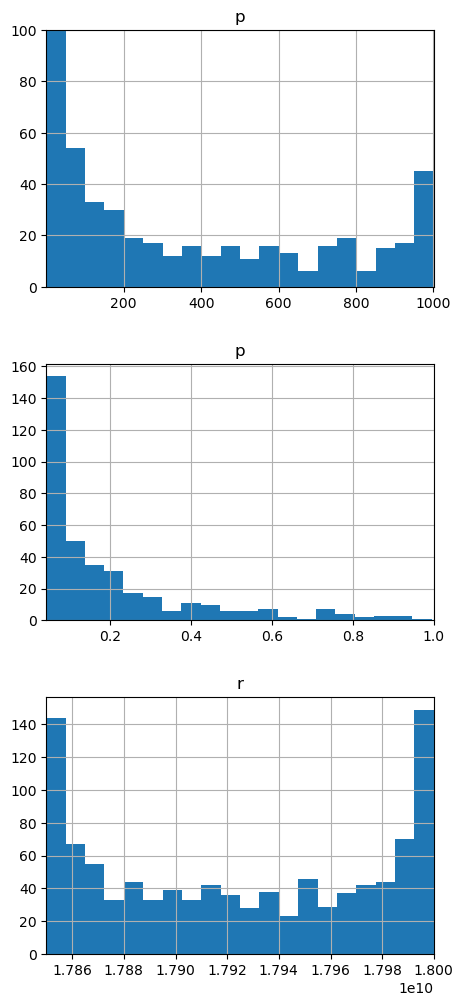

In [8]:
# Visualize
fig, axes = plt.subplots(3, figsize=(5, 12))
axes[0].set_title('p')
p.hist(ax=axes[0], bins=20)
axes[0].set_xlim(4.332436e-02, 1.00093756e+03)
axes[0].set_ylim(0, 100)

axes[1].set_title('p[p<1]')
p[p['p']<1].hist(ax=axes[1], bins=20)
axes[1].set_xlim(4.332436e-02, 1)

axes[2].set_title('r')
r.hist(ax=axes[2], bins=20)
axes[2].set_xlim(1.785000e+10, 1.80000010e+10)

In [24]:
ub = np.log(ub)
lb = np.log(lb)

dist_p = tfd.Uniform(lb[0], ub[0])
dist_r = tfd.Uniform(lb[1], ub[1])

p = dist_p.sample((batchsize, 1))
r = dist_r.sample((batchsize, 1))

p = np.exp(p)
r = np.exp(r)

p = pd.DataFrame(p[:, 0], columns=['p'])
r = pd.DataFrame(r[:, 0], columns=['r'])

/tmp/ipykernel_346053/1253350937.py:2: RuntimeWarning: invalid value encountered in log
  lb = np.log(lb)


(17850000000.0, 18000001000.0)

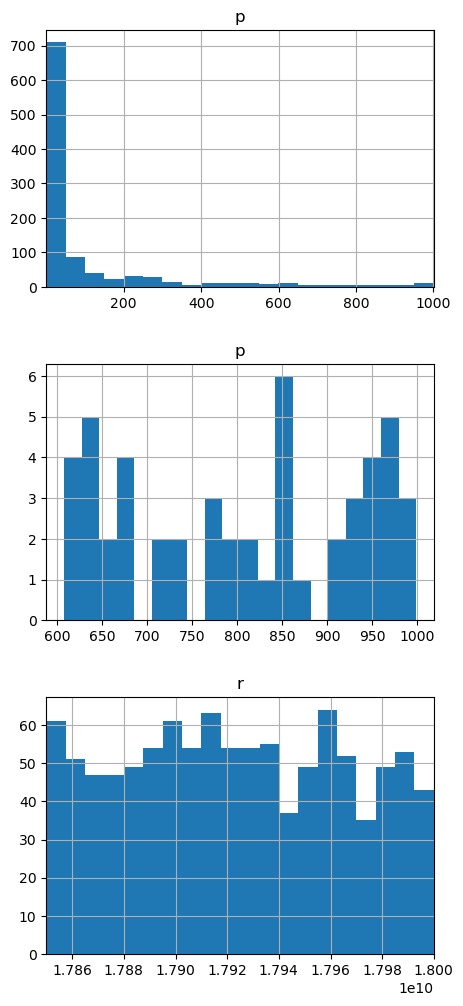

In [11]:
# Visualize
fig, axes = plt.subplots(3, figsize=(5, 12))
axes[0].set_title('p')
p.hist(ax=axes[0], bins=20)
axes[0].set_xlim(4.332436e-02, 1.00093756e+03)

axes[1].set_title('p[p<1]')
p[p['p']>600].hist(ax=axes[1], bins=20)
# axes[1].set_xlim(4.332436e-02, 1)

axes[2].set_title('r')
r.hist(ax=axes[2], bins=20)
axes[2].set_xlim(1.785000e+10, 1.80000010e+10)